# The Power of Plots - Pyber

## Observable Trends

- There are 3 city types in which Pyber Ride service operates: Urban, Suburban, and Rural
- Urban cities account for 68.4% of total rides while Rural cities account for only 5.3% 
- Urban cities have 80.9% of all drivers while Rural cities only have 2.6% of all drivers
- As shown on the Bubble Plot graph below, Urban cities have more drivers on average and have lower fares on average. On the other hand, Rural cities have less drivers on average and have higher fares on average. This shows a correlation between number of drivers per city, average fare and city type, creating a supply and demand effect. The more drivers there are in a city the the lower the fares are and viceversa.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Files to Load
city_data = "Downloads/city_data.csv"
ride_data = "Downloads/ride_data.csv"

In [4]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(city_data_df, ride_data_df, how='outer')
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


##  Bubble Plot of Ride Sharing Data

In [6]:
# Find city types
combined_data["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Create data frames for each city type and group by city
urban = combined_data[combined_data["type"] == "Urban"].groupby([combined_data["city"]])
suburban = combined_data[combined_data["type"] == "Suburban"].groupby([combined_data["city"]])
rural = combined_data[combined_data["type"] == "Rural"].groupby([combined_data["city"]])

In [8]:
# Obtain the x and y coordinates for each of the three city types

# X coordinates
urban_x = urban["ride_id"].count()
suburban_x = suburban["ride_id"].count()
rural_x = rural["ride_id"].count()

# Y coordinates
urban_y = urban["fare"].mean()
suburban_y = suburban["fare"].mean()
rural_y = rural["fare"].mean()

# Circle size
urban_s = urban["driver_count"].mean()
suburban_s = suburban["driver_count"].mean()
rural_s = rural["driver_count"].mean()

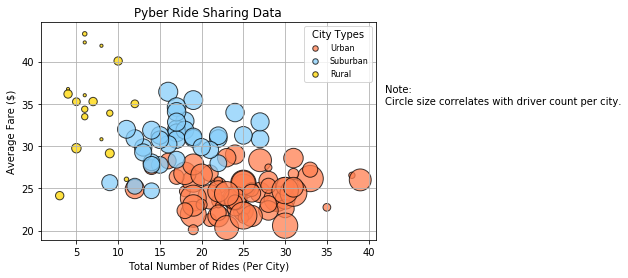

In [13]:
# Create scatter plots for each city type
plt.scatter(urban_x, urban_y, label = "Urban", s=urban_s * 10, color=["coral"],
            edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(suburban_x, suburban_y, label = "Suburban", s=suburban_y  * 10, color=["lightskyblue"],
            edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(rural_x, rural_y, label = "Rural", s=rural_s * 10, color=["gold"],
            edgecolor="black", alpha = 0.75, marker="o")

plt.grid()

# Create a title, x label, and y label
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure
plt.savefig("Pictures/BubblePlotRideSharing.png", bbox_inches="tight")

##  Total Fares by City Type

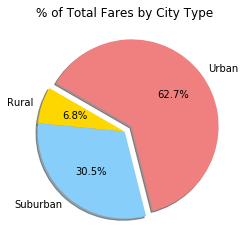

In [16]:
# Calculate fare sum for each city type
type_group= combined_data.groupby(['type'])
fare_sum = type_group['fare'].sum()

# Labels for chart
labels = ["Rural","Suburban","Urban"]

# Colors for each city type
colors = ["gold", "lightskyblue", "lightcoral"]

# Seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Create Pie Chart
# Automatically finds the percentages of each part of the pie chart
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Pictures/PieChartTotalFaresbyCityType.png")

##  Total Rides by City Type

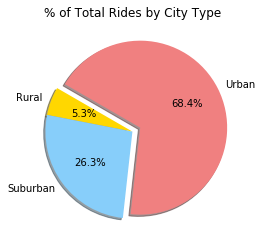

In [17]:
# Calculate count of rides
rides_count = type_group['ride_id'].count()

# Labels for chart
labels = ["Rural","Suburban","Urban"]

# Colors for each city type
colors = ["gold", "lightskyblue", "lightcoral"]

# Seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Create Pie Chart
# Automatically finds the percentages of each part of the pie chart
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pictures/PieChartTotalRidesbyCityType.png")

##  Total Drivers by City Type

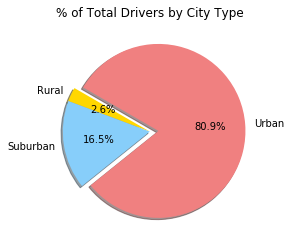

In [18]:
# Calculate driver sum for each city type
type_group = city_data_df.groupby(['type'])
driver_sum = type_group['driver_count'].sum()

# Labels for chart
labels = ["Rural","Suburban","Urban"]

# Colors for each city type
colors = ["gold", "lightskyblue", "lightcoral"]

# Seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Create Pie Chart
# Automatically finds the percentages of each part of the pie chart
plt.pie(driver_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pictures/PiechartTotalDriversbyCityType.png")